In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
import csv
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

### Mushroom Dataset

In [4]:
mushroom = pd.read_csv("newMushroom20noise.csv", sep=',')
data = mushroom.iloc[:,1:23]
labels = mushroom.iloc[:,23].astype(str)

             precision    recall  f1-score   support

          p       0.78      0.88      0.83      1755
          e       0.75      0.59      0.66      1067

avg / total       0.77      0.77      0.76      2822

accuracy:  0.7700212615166548


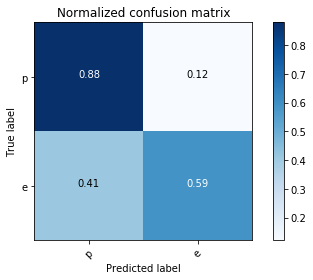

             precision    recall  f1-score   support

          p       0.79      0.85      0.82      1733
          e       0.73      0.65      0.69      1089

avg / total       0.77      0.77      0.77      2822

accuracy:  0.7725017717930546


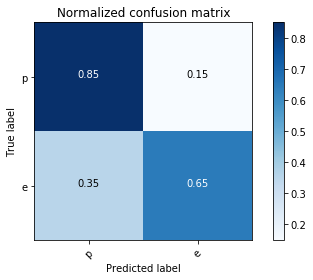

             precision    recall  f1-score   support

          p       0.76      0.92      0.84      1734
          e       0.81      0.55      0.65      1088

avg / total       0.78      0.78      0.76      2822

accuracy:  0.7763997165131112


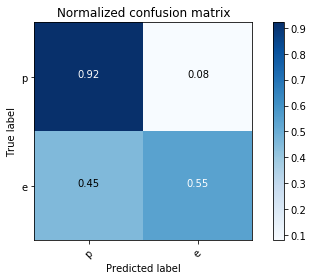

             precision    recall  f1-score   support

          p       0.81      0.79      0.80      1754
          e       0.67      0.69      0.68      1068

avg / total       0.75      0.75      0.75      2822

accuracy:  0.7515946137491141


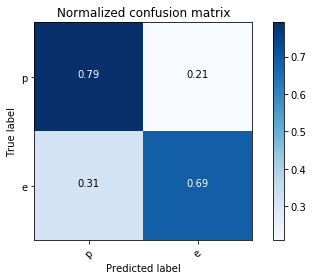

             precision    recall  f1-score   support

          p       0.79      0.83      0.81      1756
          e       0.69      0.64      0.66      1066

avg / total       0.75      0.76      0.75      2822

accuracy:  0.7569099929128278


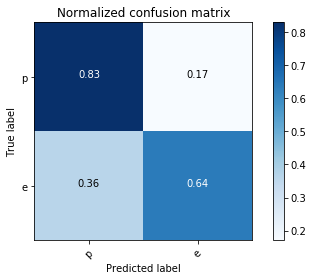

             precision    recall  f1-score   support

          p       0.78      0.89      0.83      1732
          e       0.77      0.59      0.67      1090

avg / total       0.78      0.78      0.77      2822

accuracy:  0.7756909992912828


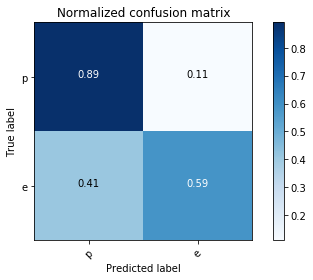

             precision    recall  f1-score   support

          p       0.78      0.87      0.83      1754
          e       0.74      0.60      0.67      1068

avg / total       0.77      0.77      0.77      2822

accuracy:  0.7710843373493976


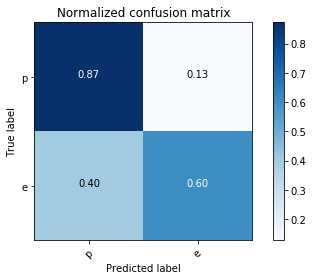

             precision    recall  f1-score   support

          p       0.79      0.86      0.82      1734
          e       0.74      0.65      0.69      1088

avg / total       0.77      0.78      0.77      2822

accuracy:  0.7756909992912828


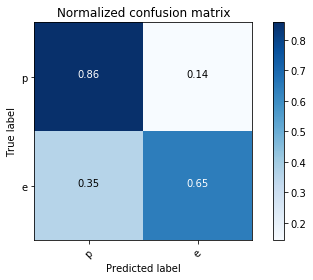

             precision    recall  f1-score   support

          p       0.78      0.80      0.79      1725
          e       0.68      0.65      0.67      1097

avg / total       0.74      0.74      0.74      2822

accuracy:  0.7445074415308292


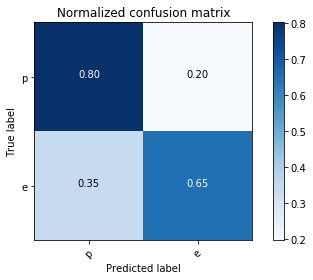

             precision    recall  f1-score   support

          p       0.79      0.93      0.85      1763
          e       0.83      0.59      0.69      1059

avg / total       0.81      0.80      0.79      2822

accuracy:  0.8012048192771084


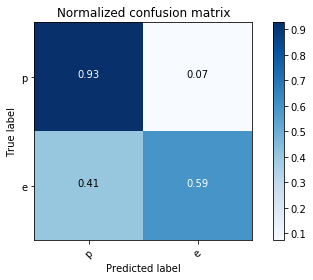

In [5]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Appendicitis Dataset

In [6]:
appendicitis = pd.read_csv("appendicitis20noise.csv", sep=',')
data = appendicitis.iloc[:,1:8]
labels = appendicitis.iloc[:,8].astype(str)

             precision    recall  f1-score   support

          1       0.90      0.93      0.91        46
          0       0.40      0.29      0.33         7

avg / total       0.83      0.85      0.84        53

accuracy:  0.8490566037735849


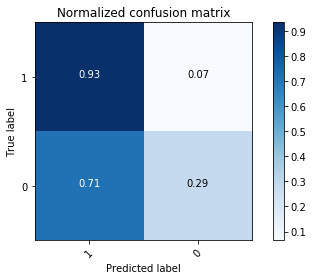

             precision    recall  f1-score   support

          1       0.77      0.92      0.84        39
          0       0.50      0.21      0.30        14

avg / total       0.70      0.74      0.70        53

accuracy:  0.7358490566037735


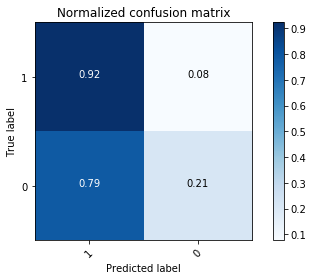

             precision    recall  f1-score   support

          1       0.88      0.84      0.86        45
          0       0.30      0.38      0.33         8

avg / total       0.80      0.77      0.78        53

accuracy:  0.7735849056603774


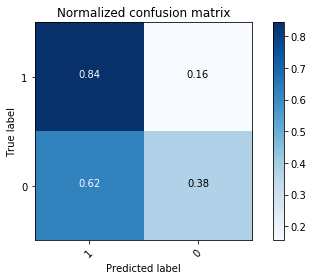

             precision    recall  f1-score   support

          1       0.80      0.70      0.75        40
          0       0.33      0.46      0.39        13

avg / total       0.69      0.64      0.66        53

accuracy:  0.6415094339622641


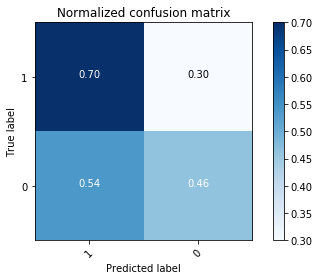

             precision    recall  f1-score   support

          1       0.77      1.00      0.87        40
          0       1.00      0.08      0.14        13

avg / total       0.83      0.77      0.69        53

accuracy:  0.7735849056603774


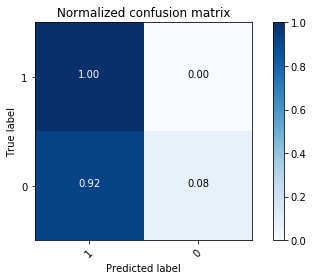

             precision    recall  f1-score   support

          1       0.88      0.80      0.84        45
          0       0.25      0.38      0.30         8

avg / total       0.78      0.74      0.76        53

accuracy:  0.7358490566037735


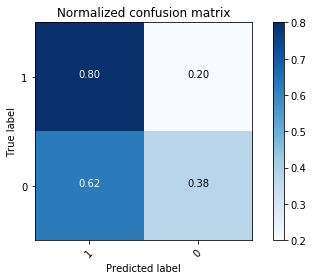

             precision    recall  f1-score   support

          1       0.76      0.76      0.76        42
          0       0.09      0.09      0.09        11

avg / total       0.62      0.62      0.62        53

accuracy:  0.6226415094339622


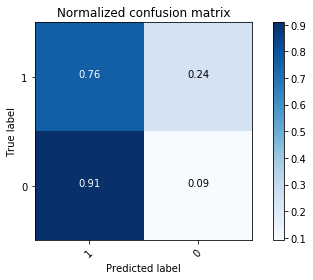

             precision    recall  f1-score   support

          1       0.85      0.91      0.88        43
          0       0.43      0.30      0.35        10

avg / total       0.77      0.79      0.78        53

accuracy:  0.7924528301886793


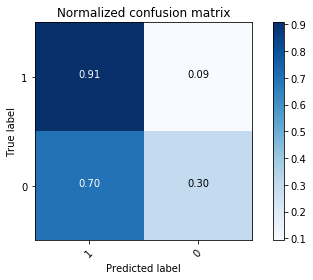

             precision    recall  f1-score   support

          1       0.85      0.93      0.89        42
          0       0.57      0.36      0.44        11

avg / total       0.79      0.81      0.79        53

accuracy:  0.8113207547169812


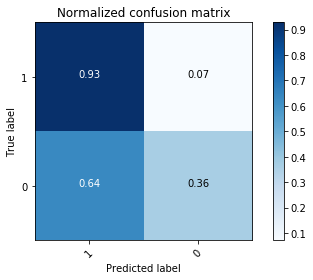

             precision    recall  f1-score   support

          1       0.88      0.88      0.88        43
          0       0.50      0.50      0.50        10

avg / total       0.81      0.81      0.81        53

accuracy:  0.8113207547169812


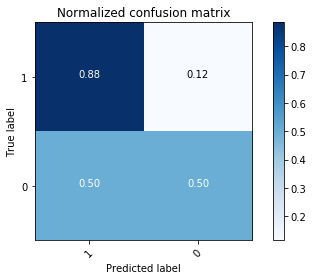

In [7]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model_poker = GaussianNB()
        dt_model_poker.fit(X_train, y_train)
        predicted = dt_model_poker.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Glass Dataset

In [8]:
glass = pd.read_csv("glass20noise.csv")
data = glass.iloc[:,1:10]
labels = glass.iloc[:,10].astype(str)

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.45      0.83      0.59        35
          3       0.38      0.16      0.23        37
          2       0.00      0.00      0.00        10
          5       1.00      0.17      0.29         6
          7       0.71      0.83      0.77         6
          6       0.63      0.92      0.75        13

avg / total       0.45      0.50      0.42       107

accuracy:  0.4953271028037383


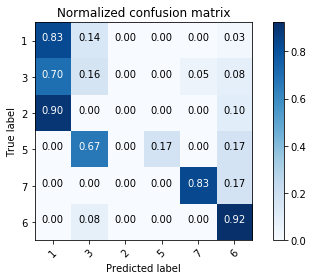

             precision    recall  f1-score   support

          1       0.49      0.83      0.62        35
          3       0.45      0.26      0.33        39
          2       0.00      0.00      0.00         7
          5       0.22      0.29      0.25         7
          7       0.50      0.67      0.57         3
          6       0.92      0.75      0.83        16

avg / total       0.49      0.51      0.48       107

accuracy:  0.514018691588785


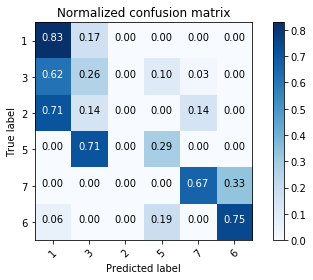

             precision    recall  f1-score   support

          1       0.40      0.87      0.55        30
          3       0.40      0.09      0.15        45
          2       0.17      0.11      0.13         9
          5       0.33      0.25      0.29         8
          7       0.83      0.71      0.77         7
          6       0.50      0.88      0.64         8

avg / total       0.41      0.42      0.35       107

accuracy:  0.4205607476635514


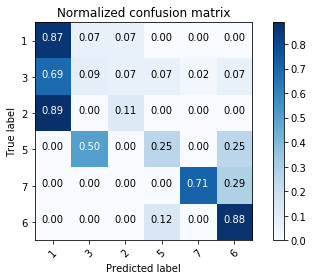

             precision    recall  f1-score   support

          1       0.57      0.80      0.67        40
          3       0.46      0.39      0.42        31
          2       0.00      0.00      0.00         8
          5       0.12      0.20      0.15         5
          7       0.33      1.00      0.50         2
          6       1.00      0.52      0.69        21

avg / total       0.56      0.54      0.52       107

accuracy:  0.5420560747663551


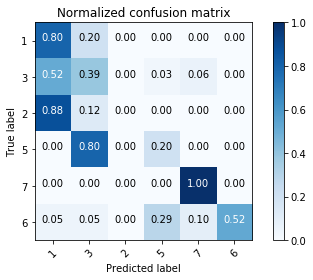

             precision    recall  f1-score   support

          1       0.36      0.38      0.37        34
          3       0.41      0.21      0.28        43
          2       0.07      0.25      0.11         4
          5       0.20      0.40      0.27         5
          7       0.50      0.67      0.57         3
          6       0.85      0.94      0.89        18

avg / total       0.45      0.41      0.41       107

accuracy:  0.411214953271028


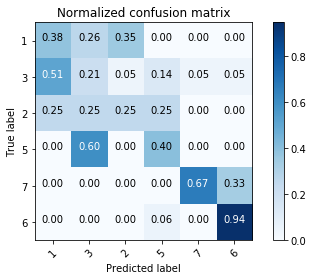

             precision    recall  f1-score   support

          1       0.48      0.83      0.61        36
          3       0.52      0.36      0.43        33
          2       0.00      0.00      0.00        13
          5       0.33      0.12      0.18         8
          7       1.00      0.33      0.50         6
          6       0.75      0.82      0.78        11

avg / total       0.48      0.50      0.46       107

accuracy:  0.5046728971962616


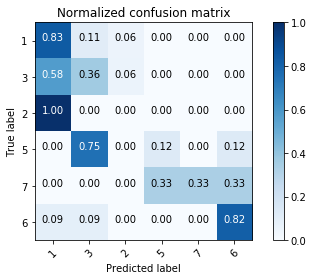

             precision    recall  f1-score   support

          1       0.46      0.74      0.57        34
          3       0.48      0.26      0.33        39
          2       0.00      0.00      0.00         7
          5       0.00      0.00      0.00         7
          7       0.67      0.67      0.67         6
          6       0.72      0.93      0.81        14

avg / total       0.45      0.49      0.45       107

accuracy:  0.48598130841121495


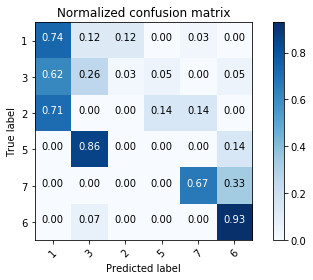

             precision    recall  f1-score   support

          1       0.48      0.78      0.60        36
          3       0.59      0.43      0.50        37
          2       0.00      0.00      0.00        10
          5       1.00      0.17      0.29         6
          7       0.43      1.00      0.60         3
          6       0.79      0.73      0.76        15

avg / total       0.55      0.55      0.51       107

accuracy:  0.5514018691588785


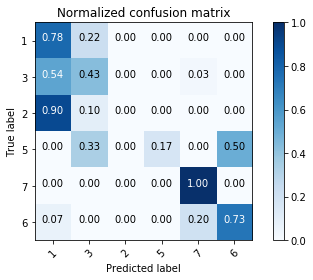

             precision    recall  f1-score   support

          1       0.50      0.06      0.10        35
          3       0.38      0.21      0.27        39
          2       0.13      0.64      0.21        11
          5       0.12      0.50      0.20         2
          7       0.20      0.50      0.29         2
          6       0.93      0.72      0.81        18

avg / total       0.48      0.30      0.30       107

accuracy:  0.29906542056074764


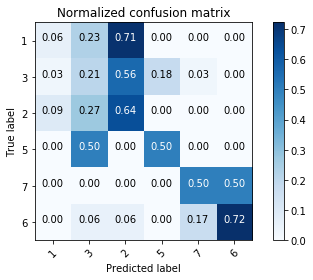

             precision    recall  f1-score   support

          1       0.49      0.86      0.62        35
          3       0.53      0.22      0.31        37
          2       0.00      0.00      0.00         6
          5       1.00      0.09      0.17        11
          7       0.67      0.86      0.75         7
          6       0.69      1.00      0.81        11

avg / total       0.56      0.52      0.46       107

accuracy:  0.5233644859813084


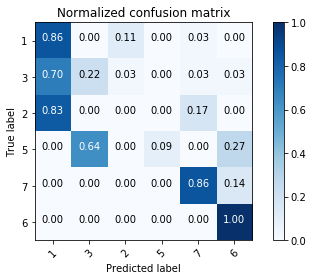

In [9]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(glass):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [10]:
print (acc)
with open("accNaiveBayesWith20Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)

['Mushroom', 0.7700212615166548, 0.7725017717930546, 0.7763997165131112, 0.7515946137491141, 0.7569099929128278, 0.7756909992912828, 0.7710843373493976, 0.7756909992912828, 0.7445074415308292, 0.8012048192771084, 'Appendicitis', 0.8490566037735849, 0.7358490566037735, 0.7735849056603774, 0.6415094339622641, 0.7735849056603774, 0.7358490566037735, 0.6226415094339622, 0.7924528301886793, 0.8113207547169812, 0.8113207547169812, 'Glass', 0.4953271028037383, 0.514018691588785, 0.4205607476635514, 0.5420560747663551, 0.411214953271028, 0.5046728971962616, 0.48598130841121495, 0.5514018691588785, 0.29906542056074764, 0.5233644859813084]
